# Coding Exercises (Part 10)

## Complete Data Workflow A-Z: Group Operations

### Exercise 13: GroupBy

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the cars dataset (cars.csv).

__Calculate__ the mean/average mpg __by origin__ (mean mpg for usa, for europe and for japan)! Who built the __least__ fuel efficient cars?

__Calculate__ the mean/average mpg __by model_year__ (mean mpg for the years 70, 71, ...). Can you see a __trend__? __Visualize__!

__Calculate__ the mean/average mpg for each __combination of model_year & origin__ and __visualize__ how the mean mpg evolved over time for usa, europe and japan. <br>
Can you see the __same trend__ for all three orgins?

Calculate the __mean__, __min__ and __max__ mpg for each combination of model_year & origin!

Return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__! <br>(hint: a __user defined function__ might help!)

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!).<br>
Then, __filter__ all cars, where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars are outliers/special cases in their respective group.

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
#run the cell
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#run the cell
cars = pd.read_csv("cars.csv")

In [3]:
#run the cell
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
#run the cell
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevrolet s-10


In [5]:
#run the cell
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


117. __Group__ cars by the column __origin__ and __calculate__ the __mean__/average __mpg__ for each origin (mean mpg for usa, for europe and for japan)! <br>
Who built the __least__ fuel efficient cars?

In [6]:
cars.groupby("origin").mpg.mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

The least fuel efficient cars are from ... usa.

118. __Group__ cars by the column __model_year__ and __calculate__ the __mean__/average __mpg__ for each model_year (mean mpg for 70, 71, 72,...)! <br>__Save__ the result in the variable __mpg_by_year__ and __round__ to two decimals!

In [7]:
mpg_by_year = cars.groupby("model_year").mpg.mean().round(2)

In [8]:
# run the cell
mpg_by_year

model_year
70    17.69
71    21.25
72    18.71
73    17.10
74    22.70
75    20.27
76    21.57
77    23.38
78    24.06
79    25.09
80    33.70
81    30.33
82    31.71
Name: mpg, dtype: float64

__Inspect__! Can you see a __trend__?

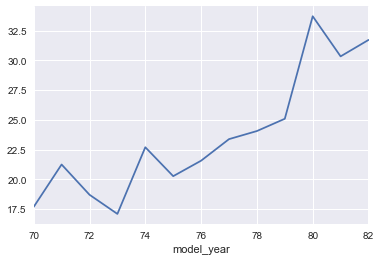

In [9]:
# run the cell!
mpg_by_year.plot()
plt.show()

The cars are getting ... more fuel efficient over time.

119. __Group__ cars by the columns __model_year and origin__ and return the __mean mpg__ for each group! <br> __Save__ the resulting DataFrame in the variable __mpg_year_origin__!
__Column labels__ of mpg_year_origin shall be __europe__, __japan__ & __usa__. __Fill in the gaps__! 

In [10]:
mpg_year_origin = cars.groupby(["model_year", "origin"]).mpg.mean().unstack().round(2)

In [11]:
# run the cell
mpg_year_origin

origin,europe,japan,usa
model_year,,,
70,25.20,25.50,15.27
71,28.75,29.50,18.10
72,22.00,24.20,16.28
73,24.00,20.00,15.03
74,27.00,29.33,18.33
75,24.50,27.50,17.55
76,24.25,28.00,19.43
77,29.25,27.42,20.72
78,24.95,29.69,21.77


__Inspect__! Do we have the __same trend__ for europe, japan and usa?

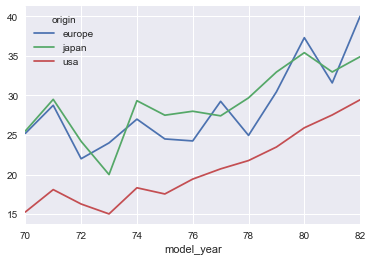

In [12]:
# run the cell
mpg_year_origin.plot()
plt.show()

It seems that manufacturer from europe, japan and usa were able to improve efficiency!

120. __Group__ cars by __model_year and origin__ and return __mean__, __max__ and __min mpg__ for all groups! __Fill in the gaps!__

In [13]:
cars.groupby(["model_year", "origin"]).mpg.agg(["mean", "min", "max"]).unstack().round(2)

mean                  min                max            
origin     europe  japan    usa europe japan   usa europe japan   usa
model_year                                                           
70          25.20  25.50  15.27   24.0  24.0   9.0   26.0  27.0  22.0
71          28.75  29.50  18.10   27.0  25.0  12.0   30.0  35.0  28.0
72          22.00  24.20  16.28   18.0  19.0  11.0   26.0  28.0  28.0
73          24.00  20.00  15.03   19.0  18.0  11.0   29.0  22.0  23.0
74          27.00  29.33  18.33   24.0  24.0  13.0   31.0  32.0  28.0
75          24.50  27.50  17.55   22.0  24.0  13.0   29.0  33.0  23.0
76          24.25  28.00  19.43   16.5  19.0  13.0   29.5  33.0  29.0
77          29.25  27.42  20.72   21.5  21.5  15.0   36.0  33.5  33.5
78          24.95  29.69  21.77   16.2  21.1  17.5   43.1  39.4  36.1
79          30.45  32.95  23.48   25.4  31.8  15.5   37.3  34.1  35.7
80          37.29  35.40  25.91   29.8  23.7  19.1   44.3  46.6  32.1
81          31.58  32.96  27.53   28.1  24.2  17.6   34.5  39.1  39.0
82          40.00  34.89  29.45   36.0  31.0  22.0   44.0  38.0  38.0

Next, return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__!

121. First, __create__ the __user defined function__ get_most_efficient! __Fill in the gaps!__ 

In [14]:
def get_most_efficient(group):
    return group.nlargest(n =2, columns = "mpg").loc[:, ["name", "mpg"]]

122. __Apply__ get_most_efficient on the appropriate __groupby object__! __Save__ the resulting DataFrame in the variable __most_eff__. __Fill in the gaps!__

In [15]:
most_eff = cars.groupby(["model_year", "origin"]).apply(get_most_efficient)

Tidy up and __Inspect__!

In [16]:
# run the cell
most_eff = most_eff.droplevel(-1)

In [17]:
# run the cell
most_eff.head(10)

name   mpg
model_year origin                             
70         europe   vw 1131 deluxe sedan  26.0
           europe               bmw 2002  26.0
           japan            datsun pl510  27.0
           japan   toyota corona mark ii  24.0
           usa           plymouth duster  22.0
           usa             ford maverick  21.0
71         europe            peugeot 304  30.0
           europe              fiat 124b  30.0
           japan             datsun 1200  35.0
           japan     toyota corolla 1200  31.0

123. __Select__ the 2 most efficient cars from __japan__ in __1980__! __Fill in the gaps!__ The __most efficient__ car is...?

In [18]:
most_eff.loc[(80, "japan")]

name   mpg
model_year origin                           
80         japan             mazda glc  46.6
           japan   honda civic 1500 gl  44.6

The most efficient car is... the mazda glc.

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!). Then, __filter__ all cars where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars all outliers/special cases in their respective group.

124. First, __group__ cars by __model_year & origin__ and calculate the __mean mpg__ for each group via the --- method to create the new column __"group_mpg"__. <br>
__Fill in the gaps!__

In [19]:
cars["group_mpg"] = cars.groupby(["model_year", "origin"]).mpg.transform("mean").round(2)

__Inspect!__ The group-specific mpg for the vw pickup is ... ?

In [20]:
# run the cell
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.27
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.27
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.27
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.27
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.27


In [21]:
# run the cell
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_mpg
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,29.45
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,40.00
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,29.45
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,29.45
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevrolet s-10,29.45


The group-specific mpg for the vw pickup is... 40.0!

125. __Create__ the column __"mpg_outlier"__ by __substracting__ the __group_mpg__ column from the __mpg__ column. __Round__ to 2 decimals! 

In [22]:
cars["mpg_outlier"] = (cars.mpg-cars.group_mpg).round(2)

In [23]:
# run the cell
cars.mpg_outlier.describe()

count    398.000000
mean       0.000653
std        4.555377
min      -11.700000
25%       -3.220000
50%       -0.885000
75%        2.730000
max       18.150000
Name: mpg_outlier, dtype: float64

126. __Filter__ cars for all cars/rows, where the __absolute value__ in the __mpg_outlier__ column is __greater than 10__! __Fill in the gaps!__<br>
There is only one car, that is __significantly less fuel efficient__ than it´s peer group. Which one?

In [24]:
cars.loc[cars.mpg_outlier.abs() > 10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_mpg,mpg_outlier
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.28,11.72
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.72,12.78
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.95,18.15
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.77,14.33
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.48,12.22
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.48,10.72
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.48,11.02
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.48,10.02
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.40,11.20
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.40,-11.70


The... mazda rx-7 gs is significantly less fuel efficient than it´s peer group (negative value in mpg_outlier column).

# Well Done!

-------------------

# Hints (Spolier!)

117. cars.groupby("---").---.mean()

118. mpg_by_year = cars.groupby("---").---.---.round(2)

119. Don´t forget unstack() method!


120. agg() method, unstack() method

121. nlargest() method; 

122. group cars by model_year & origin; pass get_most_efficient to the apply() method

123. outer index level: 80; inner index level: "japan"

124. transform() method

125. (_pandas series_ - _pandas series_).round()

126. abs() method